In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, roc_auc_score
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-risk-dataset/dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-risk-dataset/dataset.csv")

print(df.columns.to_list(), len(df.columns.to_list()))

['id', 'Duration in months', 'Credit history', 'Purpose of the credit', 'Credit amount', 'Status of savings account/bonds', 'Present employment(years)', 'Installment rate in percentage of disposable income', 'personal_status', 'Other debtors / guarantors', 'Present residence since X years', 'Property', 'Age in years', 'Other installment plans (banks/stores)', 'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'Foreign worker', 'Status of existing checking account'] 21


In [3]:
y = pd.DataFrame(df["Status of existing checking account"])
X = df.drop(["Status of existing checking account"], axis = 1)

status = {"good" : 1, "bad" : 0}
y["Status of existing checking account"] = [status[item] for item in y["Status of existing checking account"]] 

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [4]:
df.head()

,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,...,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,1,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [5]:
df.describe()

,id,Duration in months,Credit amount,Installment rate in percentage of disposable income,Present residence since X years,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,288.819436,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,1.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,250.750000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,500.500000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,750.250000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
df.isna().sum()

id                                                          0
Duration in months                                          0
Credit history                                              0
Purpose of the credit                                       0
Credit amount                                               0
Status of savings account/bonds                             0
Present employment(years)                                   0
Installment rate in percentage of disposable income         0
personal_status                                             0
Other debtors / guarantors                                  0
Present residence since X years                             0
Property                                                    0
Age in years                                                0
Other installment plans (banks/stores)                      0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [7]:
#Use this method to determine which columns should be ordinally encoded vs. OneHot encoded

df["Present residence since X years"].value_counts()

Present residence since X years
4    413
2    308
3    149
1    130
Name: count, dtype: int64

In [8]:
### Columns to OneHotEncode: "Purpose of Credit, Credit History, personal_status, other debtors, property, other installment plans, housing, job"

### Columns to Ordinal Encode: "Present Employment, Status of savings account/bonds,telephone, foreign worker"

In [9]:
ohencode_df = ("Purpose of the credit", "Credit history", "personal_status", "Other debtors / guarantors", "Property", "Other installment plans (banks/stores)", "Housing", "Job")
oencode_df = ("Present employment(years)", "Status of savings account/bonds", "Telephone", "Foreign worker")
num_df = ("Duration in months", "Credit amount", "Installment rate in percentage of disposable income", "Present residence since X years", "Age in years", "Number of existing credits at this bank", "Number of people being liable to provide maintenance for")

all_cols = (ohencode_df, oencode_df, num_df)

num_transformer = StandardScaler()
ohcat_transformer = OneHotEncoder()
ocat_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(transformers = [("oh_cat", ohcat_transformer, ohencode_df), ("o_cat", ocat_transformer, oencode_df), ("num", num_transformer, num_df)])

We can now go ahead and approach this manually, going through every feature and analyzing the best possible for our model before applying it, or we can let the model do the work for us.

We will first go through manually.

In [10]:
X_copy = df.drop(["Status of existing checking account"], axis = 1)

X_transform = preprocessor.fit_transform(X_copy)

X_transform = pd.DataFrame(X_transform, columns = preprocessor.get_feature_names_out(), index = X.index)

X_transform

,oh_cat__Purpose of the credit_business,oh_cat__Purpose of the credit_domestic appliance,oh_cat__Purpose of the credit_education,oh_cat__Purpose of the credit_furniture/equipment,oh_cat__Purpose of the credit_new car,oh_cat__Purpose of the credit_other,oh_cat__Purpose of the credit_radio/tv,oh_cat__Purpose of the credit_repairs,oh_cat__Purpose of the credit_retraining,oh_cat__Purpose of the credit_used car,...,o_cat__Status of savings account/bonds,o_cat__Telephone,o_cat__Foreign worker,num__Duration in months,num__Credit amount,num__Installment rate in percentage of disposable income,num__Present residence since X years,num__Age in years,num__Number of existing credits at this bank,num__Number of people being liable to provide maintenance for
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,1.0,1.0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,1.0,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,1.0,1.0,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290
997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,1.0,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290
998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290


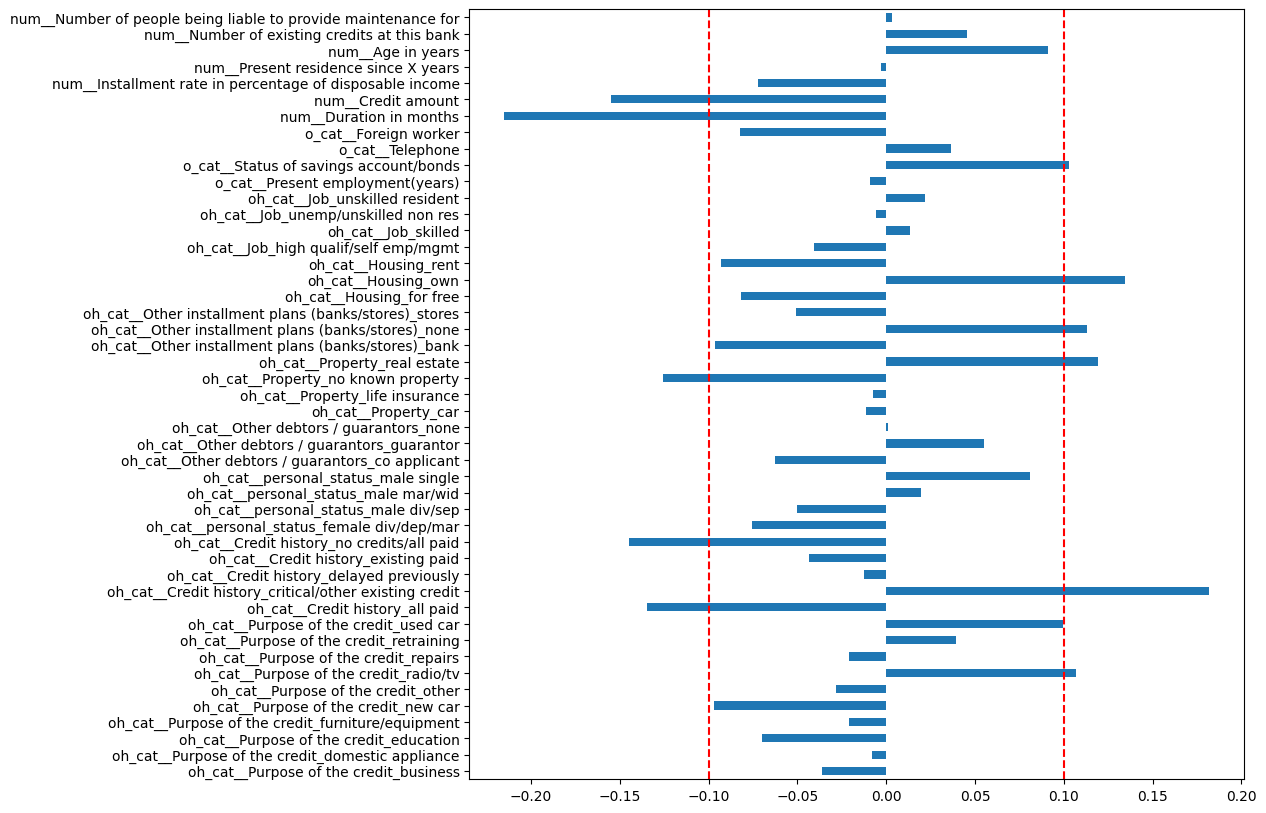

In [11]:
ax = X_transform.corrwith(y["Status of existing checking account"]).plot(kind = "barh", figsize = (10,10))
plt.axvline(0.1, c='red', linestyle='--')
plt.axvline(-0.1, c='red', linestyle='--')

In [12]:
#Visualize highly correlated features

corr = X_transform.corr()
np.fill_diagonal(corr.values, None)
corr.style.background_gradient(cmap='coolwarm')

,oh_cat__Purpose of the credit_business,oh_cat__Purpose of the credit_domestic appliance,oh_cat__Purpose of the credit_education,oh_cat__Purpose of the credit_furniture/equipment,oh_cat__Purpose of the credit_new car,oh_cat__Purpose of the credit_other,oh_cat__Purpose of the credit_radio/tv,oh_cat__Purpose of the credit_repairs,oh_cat__Purpose of the credit_retraining,oh_cat__Purpose of the credit_used car,oh_cat__Credit history_all paid,oh_cat__Credit history_critical/other existing credit,oh_cat__Credit history_delayed previously,oh_cat__Credit history_existing paid,oh_cat__Credit history_no credits/all paid,oh_cat__personal_status_female div/dep/mar,oh_cat__personal_status_male div/sep,oh_cat__personal_status_male mar/wid,oh_cat__personal_status_male single,oh_cat__Other debtors / guarantors_co applicant,oh_cat__Other debtors / guarantors_guarantor,oh_cat__Other debtors / guarantors_none,oh_cat__Property_car,oh_cat__Property_life insurance,oh_cat__Property_no known property,oh_cat__Property_real estate,oh_cat__Other installment plans (banks/stores)_bank,oh_cat__Other installment plans (banks/stores)_none,oh_cat__Other installment plans (banks/stores)_stores,oh_cat__Housing_for free,oh_cat__Housing_own,oh_cat__Housing_rent,oh_cat__Job_high qualif/self emp/mgmt,oh_cat__Job_skilled,oh_cat__Job_unemp/unskilled non res,oh_cat__Job_unskilled resident,o_cat__Present employment(years),o_cat__Status of savings account/bonds,o_cat__Telephone,o_cat__Foreign worker,num__Duration in months,num__Credit amount,num__Installment rate in percentage of disposable income,num__Present residence since X years,num__Age in years,num__Number of existing credits at this bank,num__Number of people being liable to provide maintenance for
oh_cat__Purpose of the credit_business,nan,-0.036121,-0.075191,-0.154078,-0.181149,-0.036121,-0.204388,-0.049157,-0.031234,-0.111062,0.035171,-0.069940,0.172512,-0.124634,0.191739,-0.080875,0.079842,0.000888,0.039675,-0.033688,-0.046324,0.058414,0.020061,-0.012039,-0.036864,0.019869,0.063652,-0.095155,0.070902,-0.059613,0.051083,-0.012013,0.006128,-0.007768,-0.003087,0.005068,-0.045076,-0.054948,0.088221,0.046343,0.164113,0.103016,-0.025326,-0.048899,-0.001772,0.084980,-0.000327
oh_cat__Purpose of the credit_domestic appliance,-0.036121,nan,-0.025283,-0.051810,-0.060912,-0.012146,-0.068727,-0.016529,-0.010503,-0.037345,0.017528,-0.050769,-0.034234,0.066980,-0.022496,0.045275,0.016856,-0.003305,-0.047535,-0.022787,-0.025811,0.035290,-0.019190,0.004700,-0.021577,0.032983,-0.017734,0.029079,-0.024475,-0.038348,0.029317,-0.003546,-0.045933,0.046414,0.046082,-0.032144,-0.029391,0.002150,-0.015871,0.021602,-0.037212,-0.069268,0.019088,-0.017816,-0.012562,-0.061782,-0.047201
oh_cat__Purpose of the credit_education,-0.075191,-0.025283,nan,-0.107850,-0.126799,-0.025283,-0.143066,-0.034408,-0.021863,-0.077740,0.011690,0.043853,0.009718,-0.032176,-0.046829,0.054565,-0.031579,-0.057150,-0.003688,-0.047436,-0.053730,0.073462,-0.035075,0.015218,0.156355,-0.102988,0.013926,-0.008254,-0.007588,0.141916,-0.097880,0.000598,-0.005168,0.004752,-0.003128,0.000000,-0.017928,0.019620,0.016831,0.044969,0.003750,-0.007388,0.042471,0.040552,0.068483,-0.010728,0.041204
oh_cat__Purpose of the credit_furniture/equipment,-0.154078,-0.051810,-0.107850,nan,-0.259831,-0.051810,-0.293164,-0.070508,-0.044800,-0.159301,-0.010456,-0.017308,-0.054349,0.052404,-0.003181,0.100467,0.070907,-0.086736,-0.074042,0.059977,-0.028216,-0.019379,-0.044629,0.166183,-0.071050,-0.052191,-0.023717,0.004446,0.030595,-0.071530,-0.040496,0.105700,-0.042335,0.064393,-0.052801,-0.020778,-0.027111,-0.007587,-0.053587,0.009590,-0.062804,-0.034037,-0.062979,-0.006934,-0.127657,-0.070478,-0.086515
oh_cat__Purpose of the credit_new car,-0.181149,-0.060912,-0.126799,-0.259831,nan,-0.060912,-0.344672,-0.082896,-0.052672,-0.187291,0.005843,0.048979,-0.029949,-0.019025,-0.028446,-0.012972,-0.018424,-0.012487,0.027374,0.004836,-0.012426,0.006197,-0.053606,-0.007207,0.025940,0.042056,0

In [13]:
#Same as graph but marking all values that are not highly correlated (either positive or negative) with eachother as NA

corr = X_transform.corr()
np.fill_diagonal(corr.values, None)
corr = corr[abs(corr) > .1]
corr.fillna(0)

,oh_cat__Purpose of the credit_business,oh_cat__Purpose of the credit_domestic appliance,oh_cat__Purpose of the credit_education,oh_cat__Purpose of the credit_furniture/equipment,oh_cat__Purpose of the credit_new car,oh_cat__Purpose of the credit_other,oh_cat__Purpose of the credit_radio/tv,oh_cat__Purpose of the credit_repairs,oh_cat__Purpose of the credit_retraining,oh_cat__Purpose of the credit_used car,...,o_cat__Status of savings account/bonds,o_cat__Telephone,o_cat__Foreign worker,num__Duration in months,num__Credit amount,num__Installment rate in percentage of disposable income,num__Present residence since X years,num__Age in years,num__Number of existing credits at this bank,num__Number of people being liable to provide maintenance for
oh_cat__Purpose of the credit_business,0.000000,0.0,0.000000,-0.154078,-0.181149,0.000000,-0.204388,0.0,0.0,-0.111062,...,0.0,0.000000,0.000000,0.164113,0.103016,0.000000,0.000000,0.000000,0.000000,0.000000
oh_cat__Purpose of the credit_domestic appliance,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oh_cat__Purpose of the credit_education,0.000000,0.0,0.000000,-0.107850,-0.126799,0.000000,-0.143066,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oh_cat__Purpose of the credit_furniture/equipment,-0.154078,0.0,-0.107850,0.000000,-0.259831,0.000000,-0.293164,0.0,0.0,-0.159301,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.127657,0.000000,0.000000
oh_cat__Purpose of the credit_new car,-0.181149,0.0,-0.126799,-0.259831,0.000000,0.000000,-0.344672,0.0,0.0,-0.187291,...,0.0,0.000000,-0.154436,-0.109999,0.000000,0.000000,0.000000,0.000000,0.000000,0.102663
oh_cat__Purpose of the credit_other,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.115142,0.000000,0.104516,0.192893,0.000000,0.000000,0.000000,0.000000,0.000000
oh_cat__Purpose of the credit_radio/tv,-0.204388,0.0,-0.143066,-0.293164,-0.344672,0.000000,0.000000,0.0,0.0,-0.211317,...,0.0,0.000000,0.000000,0.000000,-0.173203,0.138552,0.000000,0.000000,0.000000,0.000000
oh_cat__Purpose of the credit_repairs,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oh_cat__Purpose of the credit_retraining,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oh_cat__Purpose of the credit_used car,-0.111062,0.0,0.000000,-0.159301,-0.187291,0.000000,-0.211317,0.0,0.0,0.000000,...,0.0,0.136693,0.000000,0.144939,0.252101,0.000000,0.107257,0.000000,0.000000,0.000000


In [14]:
# Find all columns that are relevent by correlation with target

def find_relevant(series, threshold):
    relevant_columns = []
    for col in series.index:
        print(f"Checking column: {col}, Correlation: {series[col]}")
        if abs(series[col]) > threshold:
            relevant_columns.append(col) 
    return relevant_columns

corrwith = X_transform.corrwith(y["Status of existing checking account"])
newtest = find_relevant(corrwith, 0.03) 
print("\n\nRelevant columns:", newtest)

Checking column: oh_cat__Purpose of the credit_business, Correlation: -0.03612906233429936
Checking column: oh_cat__Purpose of the credit_domestic appliance, Correlation: -0.008016434504064834
Checking column: oh_cat__Purpose of the credit_education, Correlation: -0.07008766440504613
Checking column: oh_cat__Purpose of the credit_furniture/equipment, Correlation: -0.020970599127568497
Checking column: oh_cat__Purpose of the credit_new car, Correlation: -0.09690047108093149
Checking column: oh_cat__Purpose of the credit_other, Correlation: -0.02805752076422649
Checking column: oh_cat__Purpose of the credit_radio/tv, Correlation: 0.10692217131196399
Checking column: oh_cat__Purpose of the credit_repairs, Correlation: -0.020827522893021443
Checking column: oh_cat__Purpose of the credit_retraining, Correlation: 0.03928087850141719
Checking column: oh_cat__Purpose of the credit_used car, Correlation: 0.09979075742999831
Checking column: oh_cat__Credit history_all paid, Correlation: -0.13444

In [15]:
#Test to see if only adding relevant features improves MAE

test_model = RandomForestClassifier(n_estimators = 200, random_state = 0)

X_test = X_transform[newtest]
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_test, y, train_size = 0.8, test_size = 0.2, random_state = 0)

my_pipeline_test = Pipeline(steps = [('model', test_model)])
my_pipeline_test.fit(X_train2, y_train2)

preds = my_pipeline_test.predict(X_valid2)
score = my_pipeline_test.score(X_valid2, y_valid2)
print('Acc', score)

auc = roc_auc_score(preds, y_valid)
print('AUC', auc)

/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Acc 0.745
AUC 0.6892578479404827


In [16]:
feature_importance = my_pipeline_test["model"].feature_importances_
sorted(zip(feature_importance,
          newtest),
          reverse=True)

[(0.16430792177429968, 'num__Credit amount'),
 (0.12798806774507626, 'num__Age in years'),
 (0.12418731943845915, 'num__Duration in months'),
 (0.05682573472537338, 'o_cat__Status of savings account/bonds'),
 (0.05133586561053241,
  'num__Installment rate in percentage of disposable income'),
 (0.030072805596499903, 'o_cat__Telephone'),
 (0.02810505805183401, 'num__Number of existing credits at this bank'),
 (0.027730437809500366, 'oh_cat__Purpose of the credit_new car'),
 (0.026803094227513806,
  'oh_cat__Credit history_critical/other existing credit'),
 (0.02506970251680914, 'oh_cat__Property_real estate'),
 (0.024135165268940977, 'oh_cat__Credit history_no credits/all paid'),
 (0.023041760243723952, 'oh_cat__personal_status_male single'),
 (0.022539422233114764, 'oh_cat__personal_status_female div/dep/mar'),
 (0.02144174074587498, 'oh_cat__Credit history_all paid'),
 (0.021254715347682262, 'oh_cat__Purpose of the credit_radio/tv'),
 (0.019993990568706543, 'oh_cat__Credit history_exi

Now we will start from square 1 and let the Random Forest Classifier do all the work automatically

In [17]:
#Play around with n_estimators measuring MAE until you find the appropriate amount. You can also define a function for this (see below in tuning)
## Note that we will not need to use any of our previous work with RFC as it will determine the best features for us - we can output those features and their importance values later

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 300, max_features = 10, random_state = 0)

In [18]:
my_pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('model', model)])
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_valid)
score = my_pipeline.score(X_valid, y_valid)
print('Acc', score)

auc = roc_auc_score(preds, y_valid)
print('AUC', auc)

/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Acc 0.735
AUC 0.6711123208129196


In [19]:
feature_importance = my_pipeline["model"].feature_importances_
sorted(zip(feature_importance,
          my_pipeline["preprocessor"].get_feature_names_out()),
          reverse=True)

[(0.14067860636766358, 'num__Credit amount'),
 (0.10046597343049166, 'num__Age in years'),
 (0.10027589767327096, 'num__Duration in months'),
 (0.043776996036246886, 'o_cat__Status of savings account/bonds'),
 (0.04336963437282504, 'o_cat__Present employment(years)'),
 (0.038368972347512735, 'num__Present residence since X years'),
 (0.03803467722253577,
  'num__Installment rate in percentage of disposable income'),
 (0.024280524766354953,
  'oh_cat__Credit history_critical/other existing credit'),
 (0.023136743789286967, 'oh_cat__Purpose of the credit_new car'),
 (0.022720628731535845, 'oh_cat__Credit history_no credits/all paid'),
 (0.02103993069798991, 'o_cat__Telephone'),
 (0.019212276118276077, 'num__Number of existing credits at this bank'),
 (0.018767742269702573, 'oh_cat__Credit history_all paid'),
 (0.018723195015142642, 'oh_cat__Property_real estate'),
 (0.016666100203109255, 'oh_cat__Housing_own'),
 (0.016318331889023156, 'oh_cat__personal_status_female div/dep/mar'),
 (0.01

In [20]:
#This can also be optimized by adding random ints in a grid search - will take some time to run

param_distribs = {'model__n_estimators': [100,150,200,250,300],
                 'model__max_features': [6, 8, 10, 12, 14]}

grd_search = GridSearchCV(my_pipeline, param_grid = param_distribs, scoring = 'accuracy')

grd_search.fit(X_train, y_train.values.ravel()) #solves the DataConversionWarning) 

grd_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('oh_cat', OneHotEncoder(),
                                                  ('Purpose of the credit',
                                                   'Credit history',
                                                   'personal_status',
                                                   'Other debtors / guarantors',
                                                   'Property',
                                                   'Other installment plans '
                                                   '(banks/stores)',
                                                   'Housing', 'Job')),
                                                 ('o_cat', OrdinalEncoder(),
                                                  ('Present employment(years)',
                                                   'Status of savings '
                                                   'account/bonds',
                                                   'Telephone',
                                                   'Foreign worker')),
                                                 ('num', StandardScaler(),
                                                  ('Duration in months',
                                                   'Credit amount',
                                                   'Installment rate in '
                                                   'percentage of disposable '
                                                   'income',
                                                   'Present residence since X '
                                                   'years',
                                                   'Age in years',
                                                   'Number of existing credits '
                                                   'at this bank',
                                                   'Number of people being '
                                                   'liable to provide '
                                                   'maintenance for'))])),
                ('model',
                 RandomForestClassifier(max_features=8, n_estimators=250,
                                        random_state=0))])

In [21]:
# Value came out to be less accurate than our trial and error method
grid_pipeline = grd_search.best_estimator_ 

grid_pipeline.fit(X_train, y_train)
preds = grid_pipeline.predict(X_valid)
score = grid_pipeline.score(X_valid, y_valid)
print('Acc', score)

auc = roc_auc_score(preds, y_valid)
print('AUC', auc)

/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Acc 0.715
AUC 0.6359307359307358


In [22]:
## To do -- Convert final model into first iteration, add something along the lines of this to drop unimportant columns inbetween preprocessing and model : columndrop = FunctionTransformer(lambda df: df.drop(columns_to_drop, axis=1))

In [23]:
#Fit the final model on all of the data to be used to test future credit 

final_model = RandomForestClassifier(n_estimators = 300, max_features = 10, random_state = 0)
final_pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('model', final_model)])
final_pipeline.fit(X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('oh_cat', OneHotEncoder(),
                                                  ('Purpose of the credit',
                                                   'Credit history',
                                                   'personal_status',
                                                   'Other debtors / guarantors',
                                                   'Property',
                                                   'Other installment plans '
                                                   '(banks/stores)',
                                                   'Housing', 'Job')),
                                                 ('o_cat', OrdinalEncoder(),
                                                  ('Present employment(years)',
                                                   'Status of savings '
                                                   'account/bonds',
                                                   'Telephone',
                                                   'Foreign worker')),
                                                 ('num', StandardScaler(),
                                                  ('Duration in months',
                                                   'Credit amount',
                                                   'Installment rate in '
                                                   'percentage of disposable '
                                                   'income',
                                                   'Present residence since X '
                                                   'years',
                                                   'Age in years',
                                                   'Number of existing credits '
                                                   'at this bank',
                                                   'Number of people being '
                                                   'liable to provide '
                                                   'maintenance for'))])),
                ('model',
                 RandomForestClassifier(max_features=10, n_estimators=300,
                                        random_state=0))])